In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import localSettings as ls
import math
print(ls.main_path)
import load_data_run123
import plotter_alex
import importlib
importlib.reload(plotter_alex)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
from matplotlib import gridspec
from collections import defaultdict

/home/alex/NuMI/PELEE/


In [2]:
ending = "Jan19b"

##THINK - did you last unfold with nuwro or without?

##  Energy

## Closure Tests

## Blockwise Unfolding

In [3]:

with open('../blockwise/stv-analysis-new/blockwise_unsmeared_events_energy_MC_ONLY_weighted_recoCut_incErr_'+ending+'.csv') as file:
    content = file.readlines()
events = content[0:]
    
for i in range(12):
    events[i]=events[i].rstrip().rstrip(',')
    events[i] = float(events[i])
    
print("Unsmeared events")
print(events)
print("")

#------------------------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_AC_energy_MC_ONLY_weighted_recoCut_incErr_'+ending+'.csv') as file:
    content = file.readlines()
AC = content[0:]
    
for i in range(144):
    AC[i]=AC[i].rstrip().rstrip(',')
    AC[i] = float(AC[i])
    

chunks = [AC[x:x+12] for x in range(0, len(AC), 12)]

print("AC")
print(chunks)
print("")
#---------------------------------------------------------------

with open('nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_blockwise_recoCut_comb_'+ending+'.csv') as file:
    content = file.readlines()
prior_true = content[0:]
    
for i in range(12):
    prior_true[i]=prior_true[i].rstrip().rstrip(',')
    prior_true[i] = float(prior_true[i])
    
print("Prior Truth: ")
print(prior_true)
print("")

#----------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_errors_energy_MC_ONLY_weighted_recoCut_incErr_'+ending+'.csv') as file:
    content = file.readlines()
errs = content[0:]
    
for i in range(12):
    errs[i]=errs[i].rstrip().rstrip(',')
    errs[i] = float(errs[i])
    
print("Errors: ")
print(errs)
print("")
print("################################################################")
print("")

#----------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_cov_matrix_energy_MC_ONLY_weighted_recoCut_incErr_'+ending+'.csv') as file:
    content = file.readlines()
cov = content[0:]
    
for i in range(144):
    cov[i]=cov[i].rstrip().rstrip(',')
    cov[i] = float(cov[i])
    

chunks_cov = [cov[x:x+12] for x in range(0, len(cov), 12)]

print("cov")
print(chunks_cov)
print("")


Unsmeared events
[125.981, 458.532, 243.953, 130.078, 37.4204, 87.1863, 2910.2, 8532.48, 4814.05, 2232.76, 311.507, 93.4804]

AC
[[0.207417, 0.12281, 0.0494496, 0.0337345, 0.00777263, 0.0214001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.12281, 0.637891, 0.273083, 0.132924, 0.0131564, 0.0919098, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0494496, 0.273083, 0.279874, 0.0650623, -0.0171944, 0.0246371, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0337345, 0.132924, 0.0650623, 0.239649, 0.0134757, 0.0356115, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.00777263, 0.0131564, -0.0171944, 0.0134757, 0.39209, 0.0781847, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0214001, 0.0919098, 0.0246371, 0.0356115, 0.0781847, 0.232198, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.37553, -0.0211165, 0.169415, 0.0111957, 0.000804679, 0.000633575], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0211165, 0.700384, 0.228413, 0.208462, 0.0299076, 0.00866316], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.169415, 0.228413, 0.326055, -0.0662716, -0.0105187, -0.00290102

In [4]:
with open('../blockwise/stv-analysis-new/blocks_12.txt') as file:
    content = file.readlines()
blocks = content[0:]

print(blocks)

['12\n', '0  0\n', '1  0\n', '2  0\n', '3  0\n', '4  0\n', '5  0\n', '6  1\n', '7  1\n', '8  1\n', '9  1\n', '10 1\n', '11 1\n', '12\n', '0  0\n', '1  0\n', '2  0\n', '3  0\n', '4  0\n', '5  0\n', '6  1\n', '7  1\n', '8  1\n', '9  1\n', '10 1\n', '11 1\n']


In [5]:

made_data_sig = np.dot(prior_true, chunks)
print("Prior_Truth x AC: ")
print(made_data_sig)
print("")
print("")
print("Unfolding Done with MC Data Signal: ")
print(events)
print("")

diff = made_data_sig - events
print("")
print("Difference")
print(diff)

#for i in made_data_sig:
#    print(i)

print("")
diffasfrac = np.nan_to_num(diff/made_data_sig)
print(diffasfrac*100)

Prior_Truth x AC: 
[ 125.98108716  458.5340733   243.95462293  130.07864008   37.42029653
   87.18665196 2910.20548181 8532.4801245  4814.05407258 2232.75841739
  311.50670264   93.4803748 ]


Unfolding Done with MC Data Signal: 
[125.981, 458.532, 243.953, 130.078, 37.4204, 87.1863, 2910.2, 8532.48, 4814.05, 2232.76, 311.507, 93.4804]


Difference
[ 8.71613067e-05  2.07330481e-03  1.62293326e-03  6.40084252e-04
 -1.03467782e-04  3.51958971e-04  5.48180904e-03  1.24495593e-04
  4.07258337e-03 -1.58261419e-03 -2.97355969e-04 -2.52000089e-05]

[ 6.91860252e-05  4.52159376e-04  6.65260300e-04  4.92074833e-04
 -2.76501768e-04  4.03684467e-04  1.88365017e-04  1.45907862e-06
  8.45977903e-05 -7.08815686e-05 -9.54573261e-05 -2.69575394e-05]


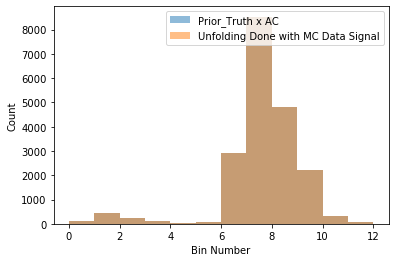

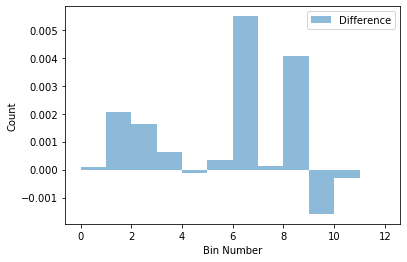

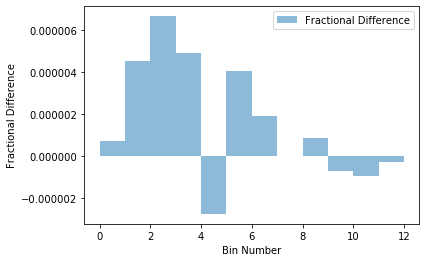

In [6]:
import random
import numpy
from matplotlib import pyplot

bins = np.arange(0, 13, 1)
count = np.arange(0.0, 12.0, 1)

pyplot.hist(count, bins, weights=made_data_sig, alpha=0.5, label='Prior_Truth x AC')
pyplot.hist(count, bins, weights=events, alpha=0.5, label='Unfolding Done with MC Data Signal')
pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Count")
pyplot.show()

pyplot.hist(count, bins, weights=diff, alpha=0.5, label='Difference')
pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Count")
pyplot.show()


pyplot.hist(count, bins, weights=diffasfrac, alpha=0.5, label='Fractional Difference')
pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Fractional Difference")
pyplot.show()

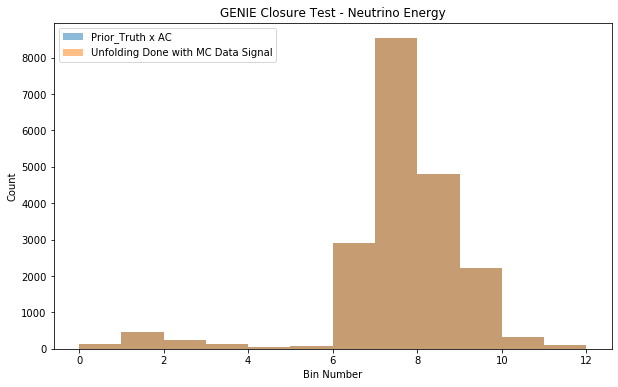

In [7]:
fig = plt.figure(figsize=(10, 6))

pyplot.hist(count, bins, weights=made_data_sig, alpha=0.5, label='Prior_Truth x AC')
pyplot.hist(count, bins, weights=events, alpha=0.5, label='Unfolding Done with MC Data Signal')
pyplot.legend(loc='upper left')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Count")
pyplot.title("GENIE Closure Test - Neutrino Energy")
pyplot.show()

fig.savefig("GENIE_closure_test_"+ending+".svg",bbox_inches='tight' )

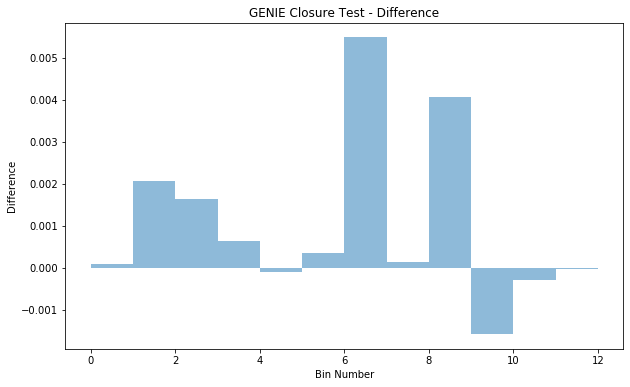

In [8]:
fig = plt.figure(figsize=(10, 6))

pyplot.hist(count, bins, weights=diff, alpha=0.5)
#pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Difference")
pyplot.title("GENIE Closure Test - Difference")
pyplot.show()

fig.savefig("GENIE_closure_test_diff_"+ending+".svg",bbox_inches='tight' )

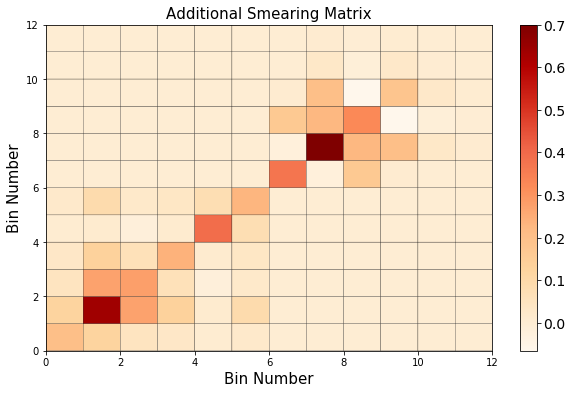

In [9]:
fig = plt.figure(figsize=(10, 6))  
    
plt.pcolor(bins, bins, chunks, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#cbar.set_label(r"Log (Power)", size=15)

plt.xlabel('Bin Number', fontsize=15)
plt.ylabel('Bin Number', fontsize=15)

plt.title('Additional Smearing Matrix', fontsize=15)

plt.show()

fig.savefig("GENIE_closure_test_Ac_"+ending+".svg",bbox_inches='tight' )

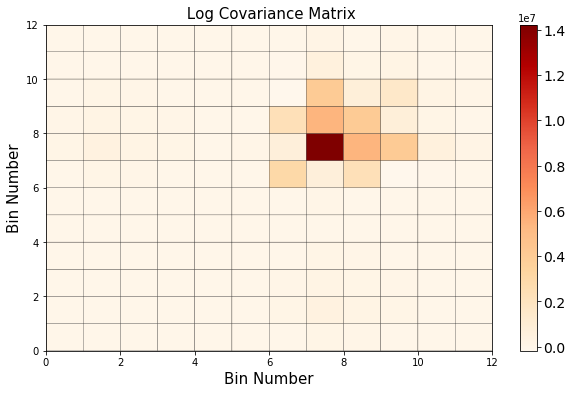

In [10]:
fig = plt.figure(figsize=(10, 6))  

#print(bins)
#bins = np.arange(0, 17, 1)
#count = np.arange(0.0, 16.0, 1)
    
plt.pcolor(bins, bins, (chunks_cov), cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#cbar.set_label(r"Log (Power)", size=15)

plt.xlabel('Bin Number', fontsize=15)
plt.ylabel('Bin Number', fontsize=15)

plt.title(' Log Covariance Matrix', fontsize=15)

plt.show()

## Need to convert to xsec units

xsec = unfolded event counts / (integrated flux * number of argon targets)

In [11]:
###################
### #N argon target calculation
###################

density = 1.3836  #g/cm^3
volume = (246-10)*(106-(-106))*(1026-10)         #cm^3
NA = 6.022E23   #atoms/mol
Nnuc = 40       #nucleans / atom
mmol = 39.95    #g/mol

Narg = (density * volume * NA * Nnuc)/mmol   #nucleons

print("number of argon targets = ", Narg)

number of argon targets =  4.240685683288815e+31


In [12]:
#Need R1 AND R3

####NUE
POT_R1 = 2.0E20 
int_flux_per_POT_R1 = 1.1864530596659353e-11
POT_R3 = 5.014E20
int_flux_per_POT_R3 = 8.628376225834778e-12

int_flux = (int_flux_per_POT_R1*POT_R1) + (int_flux_per_POT_R3*POT_R3)    #cm^-2

print("Nue integrated flux: ", int_flux)

####NUMU

POT_numu_R1 = 2.0E20 
int_flux_per_POT_numu_R1 = 5.455771063338641e-10
POT_numu_R3 = 5.014E20 
int_flux_per_POT_numu_R3 = 3.6729003479115414e-10

int_flux_numu = (int_flux_per_POT_numu_R1*POT_numu_R1) + (int_flux_per_POT_numu_R3*POT_numu_R3)    #cm^-2

print("Numu integrated flux: ", int_flux_numu)

Nue integrated flux:  6699173958.965427
Numu integrated flux:  293274644711.0575


In [13]:
nue_events = np.array(events[0:6])
numu_events = np.array(events[6:12])

nue_errs = np.array(errs[0:6])
numu_errs = np.array(errs[6:12])

In [14]:
#number of events

xsec_nue_events = nue_events / (int_flux * Narg )     
xsec_numu_events = numu_events / (int_flux_numu * Narg )     


#uncertainty

#xsec_nue_errs = nue_errs / (int_flux * Narg )     
#xsec_numu_errs = numu_errs / (int_flux_numu * Narg )     

In [15]:
#Need the four sections of the cov matrix

blockwise_errs = chunks_cov
#print(blockwise_errs)
#print("")

#NUE ONLY
bot_left = blockwise_errs[:6]
for i in range(len(bot_left)):
    bot_left[i] = bot_left[i][:6]
    
nue_errs_bot = np.array(bot_left)/((int_flux*int_flux)*(Narg*Narg))
xsec_nue_errs = (np.sqrt(np.diag(nue_errs_bot)))
    
#MIX
bot_right = blockwise_errs[:6]
for i in range(len(bot_right)):
    bot_right[i] = bot_right[i][6:]
    
mix_errs_bot = np.array(bot_right)/((int_flux*int_flux_numu)*(Narg*Narg))
xsec_botmix_errs = np.nan_to_num(np.sqrt(np.diag(mix_errs_bot)))

    
#MIX
top_left = blockwise_errs[6:]
for i in range(len(top_left)):
    top_left[i] = top_left[i][:6]
    
mix_errs_top = np.array(top_left)/((int_flux*int_flux_numu)*(Narg*Narg))
xsec_topmix_errs = np.nan_to_num(np.sqrt(np.diag(mix_errs_top)))

#NUMU ONLY
top_right = blockwise_errs[6:]
for i in range(len(top_right)):
    top_right[i] = top_right[i][6:]
    
numu_errs_top = np.array(top_right)/((int_flux_numu*int_flux_numu)*(Narg*Narg))
xsec_numu_errs = (np.sqrt(np.diag(numu_errs_top)))


In [16]:
### Calculate ratio uncertainties

xsec_ratio_events = np.nan_to_num(xsec_nue_events/xsec_numu_events)
print("Ratio event counts: ", xsec_ratio_events)
print("")

#####################

ratio_sq = (xsec_nue_events/xsec_numu_events)*(xsec_nue_events/xsec_numu_events)
print("ratio_sq: ", ratio_sq)
print("")
nue_term = (xsec_nue_errs*xsec_nue_errs)/(xsec_nue_events*xsec_nue_events)
print("nue: ", nue_term)
print("")
numu_term = (xsec_numu_errs*xsec_numu_errs)/(xsec_numu_events*xsec_numu_events)
print("numu: ", numu_term)
print("")
mix_1 = (xsec_botmix_errs*xsec_botmix_errs)/(xsec_numu_events*xsec_nue_events)
print("mix: ", mix_1)
print("")
mix_2 = (xsec_topmix_errs*xsec_topmix_errs)/(xsec_numu_events*xsec_nue_events)
print("mix: ", mix_2)
print("")

ratio_var_errs = ratio_sq*(nue_term + numu_term - mix_1 - mix_2)
print(ratio_var_errs)
xsec_ratio_errs = np.nan_to_num(np.sqrt(abs(ratio_var_errs)))
print("Ratio errs: ", xsec_ratio_errs)

Ratio event counts:  [ 1.8951146   2.35259751  2.21844583  2.55043976  5.25888746 40.83014737]

ratio_sq:  [   3.59145934    5.53471503    4.9215019     6.50474295   27.65589734
 1667.10093424]

nue:  [0.16040489 0.15374628 0.15195806 0.17130266 0.17096146 0.17812389]

numu:  [0.35470969 0.19529632 0.17479122 0.32328381 0.34793157 0.32467384]

mix:  [0.11098658 0.11650528 0.10716604 0.11972539 0.07840501 0.12449372]

mix:  [0.11098658 0.11650528 0.10716604 0.11972539 0.07840501 0.12449372]

[  1.05280545   0.64220432   0.55326149   1.659592    10.01373039
 423.12736334]
Ratio errs:  [ 1.02606308  0.80137651  0.74381549  1.28825153  3.16444788 20.57005988]


In [17]:
print(xsec_nue_events)
print("")
print(xsec_numu_events)
print("")
print(xsec_nue_errs)
print("")
print(xsec_numu_errs)

[4.43453117e-40 1.61403263e-39 8.58714554e-40 4.57874557e-40
 1.31719807e-40 3.06895774e-40]

[2.33998048e-40 6.86064073e-40 3.87079343e-40 1.79527690e-40
 2.50470861e-41 7.51640133e-42]

[1.77605540e-40 6.32870153e-40 3.34742374e-40 1.89508443e-40
 5.44628292e-41 1.29524520e-40]

[1.39363409e-40 3.03187790e-40 1.61830285e-40 1.02075947e-40
 1.47742051e-41 4.28285734e-42]


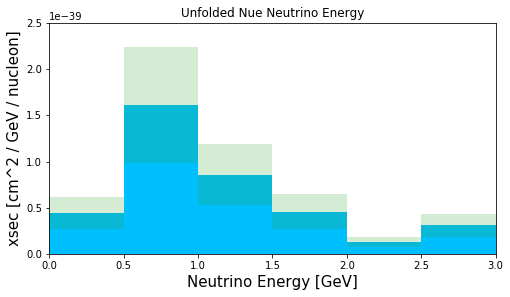

In [18]:
import random
import numpy
from matplotlib import pyplot
"""
bins = np.arange(0, 5.5, 0.5)
count = np.arange(0.1, 5.1, 0.5)
print(count)

plt.ylim(0, 5E-39)

plt.xlabel("Energy [GeV]")
plt.ylabel("xsec [cm^2]")

pyplot.hist(count, bins, weights=xsec_nue_events, alpha=0.5)
#pyplot.legend(loc='upper right')
pyplot.show()
"""

nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])
nue_ax1.set_xlim([0, 3])

bins = np.arange(0, 3.5, 0.5)
bincenters = np.arange(0.25, 3.25, 0.5)
bin_edges = np.arange(0, 3.5, 0.5)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(0.1, 3.1, 0.5)
weights = []
for i in range(len(count)):
    weight = count[i]*xsec_nue_events[i]
    weights.append(weight)

sel = nue_ax1.hist(count, bins, color='deepskyblue', weights=xsec_nue_events)
plt.ylim(0, 2.5E-39)
nue_ax1.set_xlabel('Neutrino Energy [GeV]', fontsize=15)
nue_ax1.set_ylabel('xsec [cm^2 / GeV / nucleon]', fontsize=15)
nue_ax1.set_title("Unfolded Nue Neutrino Energy")

lower_err = np.nan_to_num(xsec_nue_events-xsec_nue_errs)

nue_ax1.bar(bincenters, xsec_nue_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

nue_fig.savefig("unfolded_MC_nue_"+ending+".svg",bbox_inches='tight' )

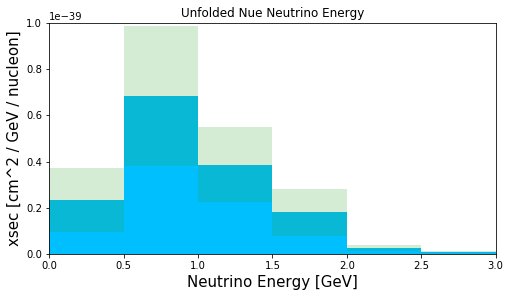

In [19]:
import random
import numpy
from matplotlib import pyplot

numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])
numu_ax1.set_xlim([0, 3])

bins = np.arange(0, 3.5, 0.5)
bincenters = np.arange(0.25, 3.25, 0.5)
bin_edges = np.arange(0, 3.5, 0.5)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(0.1, 3.1, 0.5)
weights = []
for i in range(len(count)):
    weight = count[i]*xsec_numu_events[i]
    weights.append(weight)

sel = numu_ax1.hist(count, bins, color='deepskyblue', weights=xsec_numu_events)
plt.ylim(0, 1E-39)
numu_ax1.set_xlabel('Neutrino Energy [GeV]', fontsize=15)
numu_ax1.set_ylabel('xsec [cm^2 / GeV / nucleon]', fontsize=15)
numu_ax1.set_title("Unfolded Nue Neutrino Energy")

lower_err = np.nan_to_num(xsec_numu_events-xsec_numu_errs)

numu_ax1.bar(bincenters, xsec_numu_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

numu_fig.savefig("unfolded_MC_numu_"+ending+".svg",bbox_inches='tight' )

[ 1.8951146   2.35259751  2.21844583  2.55043976  5.25888746 40.83014737]
[ 1.8951146   2.35259751  2.21844583  2.55043976  5.25888746 40.83014737]


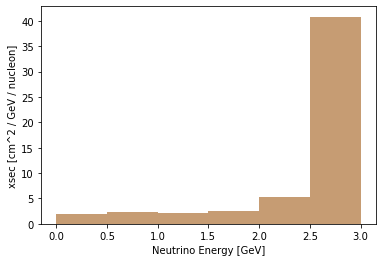

In [20]:
#Think need to replace 2nd bin due to unfolding

import random
import numpy
from matplotlib import pyplot

bins = np.arange(0, 3.5, 0.5)
count = np.arange(0.1, 3.1, 0.5)
#print(count)

#plt.ylim(0, 35)
plt.xlabel("Neutrino Energy [GeV]")
plt.ylabel("xsec [cm^2 / GeV / nucleon]")

print(xsec_nue_events/xsec_numu_events)
print(xsec_ratio_events)

pyplot.hist(count, bins, weights=np.nan_to_num(xsec_nue_events/xsec_numu_events), alpha=0.5)
pyplot.hist(count, bins, weights=xsec_ratio_events, alpha=0.5)

#pyplot.legend(loc='upper right')
pyplot.show()


[ 1.8951146   2.35259751  2.21844583  2.55043976  5.25888746 40.83014737]


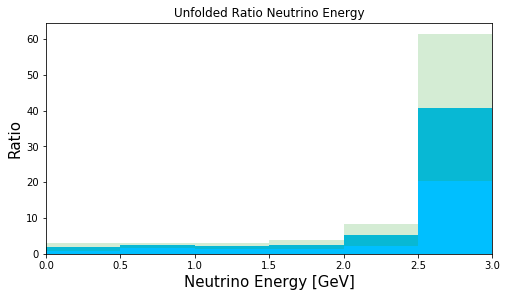

In [21]:
import random
import numpy
from matplotlib import pyplot


ratio_fig = plt.figure(figsize=(8, 7))
ratio_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ratio_ax1 = plt.subplot(ratio_gs[0])
ratio_ax1.set_xlim([0, 3])

bins = np.arange(0, 3.5, 0.5)
bincenters = np.arange(0.25, 3.25, 0.5)
bin_edges = np.arange(0, 3.5, 0.5)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(0.1, 3.1, 0.5)
#print(len(count))
#weights = []
#for i in range(len(count)):
#    weight = count[i]*xsec_ratio_events[i]
#    weights.append(weight)


#test_weights = [(random.random()/random.random() - 0.75) for x in range(len(count))]
#print(count)
#xsec_ratio_events[7] = 0
#print(xsec_ratio_events)
print("")
sel = ratio_ax1.hist(count, bins, color='deepskyblue', weights=xsec_ratio_events)  # , weights=xsec_ratio_events
print(sel[0])

#plt.ylim(0, 8)
ratio_ax1.set_xlabel('Neutrino Energy [GeV]', fontsize=15)
ratio_ax1.set_ylabel('Ratio', fontsize=15)
ratio_ax1.set_title("Unfolded Ratio Neutrino Energy")

lower_err = np.nan_to_num(xsec_ratio_events-xsec_ratio_errs)

ratio_ax1.bar(bincenters, xsec_ratio_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

ratio_fig.savefig("unfolded_MC_ratio_"+ending+".svg",bbox_inches='tight' )

In [22]:
nue_frac_err = xsec_nue_errs/xsec_nue_events
numu_frac_err = xsec_numu_errs/xsec_numu_events
ratio_frac_err = xsec_ratio_errs/xsec_ratio_events

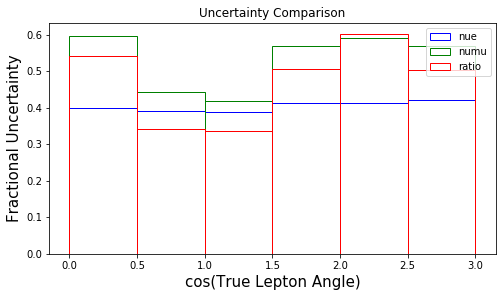

In [23]:
errors_fig = plt.figure(figsize=(8, 7))
errors_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
errors_ax1 = plt.subplot(ratio_gs[0])


bins = np.arange(0, 3.5, 0.5)
count = np.arange(0.1, 3.1, 0.5)
#plt.ylim(0, 1)

sel_nue = errors_ax1.hist(count, bins, edgecolor='blue', facecolor='None', weights=nue_frac_err, label='nue')
sel_numu = errors_ax1.hist(count, bins, edgecolor='green', facecolor='None', weights=numu_frac_err, label='numu')
sel_ratio = errors_ax1.hist(count, bins, edgecolor='red', facecolor='None', weights=ratio_frac_err, label='ratio')
errors_ax1.set_ylabel('Fractional Uncertainty', fontsize=15)
errors_ax1.set_xlabel('cos(True Lepton Angle)', fontsize=15)
errors_ax1.set_title("Uncertainty Comparison")
leg = errors_ax1.legend()